In [31]:
# Aligned spin bank generated using IMRPhenomXAS waveforms 
# non-aligned spin signal waveforms generated using IMRPhenomPv3HM ...(precessing, non aligned spins) - 0.99 spin limit
# use mass ratio distribution instead of component masses

from glue.ligolw import ligolw
from glue.ligolw import table
from glue.ligolw import lsctables
from glue.ligolw import ilwd
from glue.ligolw import utils as ligolw_utils
from pycbc import pnutils
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

### Mass distribution information:
######  --m-distr massDist       set the mass distribution of injections must be one of:
######                           source: using file containing list of mass pairs
######                           nrwaves: using xml file with list of NR waveforms (requires setting max/min total masses)
######                           totalMass: uniform distribution in total mass
######                           componentMass: uniform in m1 and m2
######                           gaussian: gaussian mass distribution
######                           log: log distribution in component mass
######                           totalMassRatio: uniform distribution in total mass and mass ratio m1 /m2                         
######                           logTotalMassUniformMassRatio: log distribution in total mass and uniform in mass ratio
######                           totalMassFraction: uniform distribution in total mass and in m1 /(m1+m2)                         
######                           m1m2SquareGrid: component masses on a square grid
######                           fixMasses: fix m1 and m2 to specific values

In [14]:
with open("banksim.ini", 'a') as fout:
    fout.write("""\
[inspinj]
f-lower = 15 
i-distr = fixed
fixed-inc = 0
m-distr = totalMassRatio 
disable-milkyway =
min-mratio = 1. 
max-mratio = 9. 
min-distance = 1000  
l-distr = random  
min-mtotal = 6
waveform = IMRPhenomPv3HM
enable-spin =
max-mtotal = 50
min-spin1 = 0 
max-spin1 = 0.99
min-spin2 = 0 
max-spin2 = 0.99
max-distance = 1000 
d-distr = uniform 
gps-start-time = 1000000000 
gps-end-time =   1000010000
time-interval = 0. 
time-step = 1. 
seed = 3 

[executables]
banksim = /cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.16.10/bin/pycbc_banksim

[workflow]
accounting-group = ligo.dev.o3.cbc.explore.test
log-path = /home/isha.anantpurkar/AlignedSpins/AlignedSpinBank/BankEffectualness_NonAlignedSpinsHM_spins99/logs
;use-gpus =
bank-file = AlignedSpinLowMassBank.xml
injections-per-job = 50
templates-per-job = 500 

[banksim]
psd-model = aLIGOZeroDetHighPower 
template-approximant = IMRPhenomXAS 
template-phase-order = 7 
;template-amplitude-order = 0 
;template-spin-order = 
template-start-frequency = 20
template-sample-rate = 16384
signal-approximant = IMRPhenomPv3HM
signal-phase-order = 7 
;signal-amplitude-order = 0 
;signal-spin-order = 7
signal-sample-rate = 32768
signal-start-frequency = 20
filter-low-frequency = 20
filter-sample-rate = 4096
filter-signal-length = 256
mchirp-window = 0.10
""")

In [37]:
! tail -n20 banksim.dag.dagman.out

04/08/21 21:03:27 Number of idle job procs: 87
04/08/21 21:04:02 Currently monitoring 1 HTCondor log file(s)
04/08/21 21:04:02 Event: ULOG_EXECUTE for HTCondor Node adc2c80ea1dc27be8f0d1c180d6bd0c1 (184741187.0.0) {04/08/21 21:03:58}
04/08/21 21:04:02 Number of idle job procs: 86
04/08/21 21:04:22 Currently monitoring 1 HTCondor log file(s)
04/08/21 21:04:22 Event: ULOG_EXECUTE for HTCondor Node 7dcfd5d6bf3f140d2cecdfc002e2a915 (184750890.0.0) {04/08/21 21:04:19}
04/08/21 21:04:22 Number of idle job procs: 85
04/08/21 21:04:27 Currently monitoring 1 HTCondor log file(s)
04/08/21 21:04:27 Event: ULOG_JOB_TERMINATED for HTCondor Node 447cbefaf6127eef55155bf674a25e2c (184750259.0.0) {04/08/21 21:04:23}
04/08/21 21:04:27 Number of idle job procs: 85
04/08/21 21:04:27 Node 447cbefaf6127eef55155bf674a25e2c job proc (184750259.0.0) completed successfully.
04/08/21 21:04:27 Node 447cbefaf6127eef55155bf674a25e2c job completed
04/08/21 21:04:27 DAG status: 2 (DAG_STATUS_NODE_FAILED)
04/08/21 21:

In [6]:
! ls

AlignedSpinLowMassBank.xml
bank
banksim.dag
banksim.dag.condor.sub
banksim.dag.dagman.log
banksim.dag.dagman.out
banksim.dag.lib.err
banksim.dag.lib.out
banksim.dag.lock
banksim.dag.nodes.log
banksim.dax
banksim.ini
banksim.sh
EffectualnessAlignedSpins_NonAlignedSpinsHM.ipynb
injection
inj.xml
log
logs
match
match-part
partial_results.sh
plots
pycbc_banksim_collect_results.sub
pycbc_banksim_match_combine.sub
pycbc_banksim_plots.sub
pycbc_banksim.sub
scripts
submit.sh


In [5]:
!sh partial_results.sh

In [29]:
#! tail -n20 log/pycbc_banksim-151945726-0.err

tail: cannot open ‘log/pycbc_banksim-151945726-0.err’ for reading: No such file or directory


In [2]:
#! pycbc_banksim --help | grep m-distr

/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.18.0/lib/python2.7/site-packages/OpenSSL/crypto.py:14: CryptographyDeprecationWarning: Python 2 is no longer supported by the Python core team. Support for it is now deprecated in cryptography, and will be removed in the next release.
  from cryptography import utils, x509


In [29]:
import numpy as np

In [35]:
res = np.loadtxt('results.dat')

match = res[:,0]

tmass1 = res[:,1]
tmass2 = res[:,2]
tspin1x = res[:,3] 
tspin1y = res[:,4]
tspin1z = res[:,5]
tspin2x = res[:,6]
tspin2y = res[:,7]
tspin2z = res[:,8]
tmchirp, teta = pnutils.mass1_mass2_to_mchirp_eta(tmass1, tmass2)
tbeta, tsigma, tgamma = pnutils.get_beta_sigma_from_aligned_spins(teta, tspin1z, tspin2z)


imass1 = res[:,9]
imass2 = res[:,10]
ispin1x = res[:,11]
ispin1y = res[:,12]
ispin1z = res[:,13]
ispin2x = res[:,14]
ispin2y = res[:,15]
ispin2z = res[:,16]
imchirp, ieta = pnutils.mass1_mass2_to_mchirp_eta(imass1, imass2)
ibeta, isigma, igamma = pnutils.get_beta_sigma_from_aligned_spins(ieta, ispin1z, ispin2z)

iq = np.maximum(imass1/imass2, imass2/imass1)
s1m = (ispin1x**2+ispin1y**2+ispin1z**2)**0.5
s2m = (ispin2x**2+ispin2y**2+ispin2z**2)**0.5

In [39]:
min(match)

0.0424

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: M vs q')

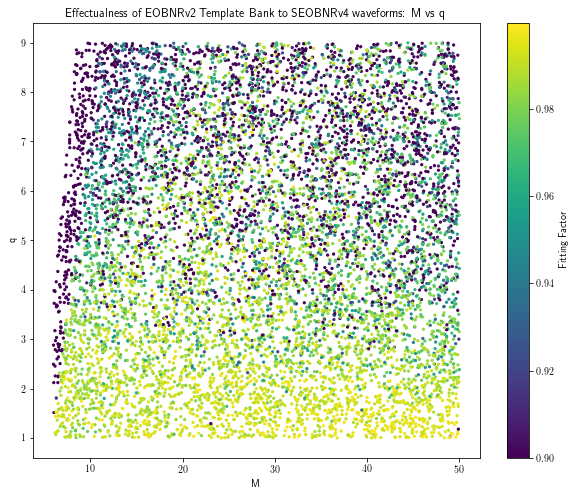

In [40]:
from matplotlib import rc
rc('text', usetex=True)

plt.figure(figsize = (10,8))
plt.scatter(imass1 + imass2, iq, s=5 ,c = match, vmin=0.9)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("M")
plt.ylabel("q")
#plt.xlim([1,8])
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: M vs q")

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: q vs chi')

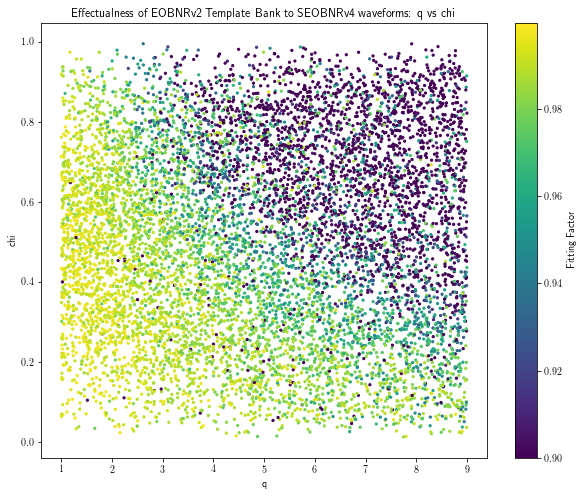

In [43]:
ichi_eff = (s1m*imass1 + s2m*imass2)/(imass1 + imass2)

plt.figure(figsize = (10,8))
plt.scatter(iq, ichi_eff, s=5 ,c = match, vmin=0.9)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("q")
plt.ylabel("chi")
#plt.xlim([1,8])
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: q vs chi")

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: M vs chi')

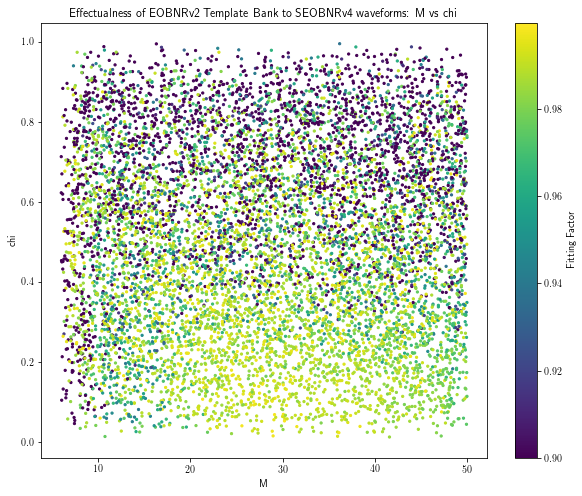

In [44]:
plt.figure(figsize = (10,8))
plt.scatter(imass1 + imass2, ichi_eff, s=5 ,c = match, vmin=0.9)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("M")
plt.ylabel("chi")
#plt.xlim([1,8])
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: M vs chi")

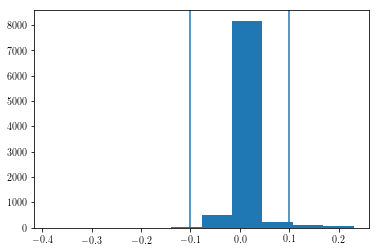

In [45]:
plt.hist((tmchirp-imchirp)/tmchirp)
plt.axvline(-0.1)
plt.axvline(0.1)